In [49]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
train = pd.read_csv("./mnist_train.csv")
test = pd.read_csv("./mnist_test.csv")

In [51]:
x_train = train.drop(['label'], axis=1).values
y_train = train['label'].values

x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

x_train = x_train.reshape((x_train.shape[0], 28 * 28 * 1))
x_test = x_test.reshape((x_test.shape[0], 28 * 28 * 1))

x_test = x_test.astype('float32') / 255
x_train = x_train.astype('float32')/255


In [52]:
x_train.shape

(60000, 784)

In [53]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [54]:
model=Sequential()
model.add(Dense(128,input_shape=(784,),activation="sigmoid"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [55]:
sgd=SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 2.2915 - accuracy: 0.1449 - val_loss: 2.2628 - val_accuracy: 0.1353
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 2.2405 - accuracy: 0.2878 - val_loss: 2.2123 - val_accuracy: 0.4745
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 2.1835 - accuracy: 0.4643 - val_loss: 2.1454 - val_accuracy: 0.5078
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 2.1051 - accuracy: 0.5461 - val_loss: 2.0501 - val_accuracy: 0.6365
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 1.9928 - accuracy: 0.5993 - val_loss: 1.9149 - val_accuracy: 0.6193
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 1.8389 - accuracy: 0.6270 - val_loss: 1.7384 - val_accuracy: 0.6609
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 1.6527 - accuracy: 0.6595 - val_loss: 1.5417 - val_accuracy: 0.6867
Epoch

In [56]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       980
           1       0.77      0.98      0.87      1135
           2       0.84      0.71      0.77      1032
           3       0.65      0.87      0.75      1010
           4       0.75      0.76      0.76       982
           5       0.89      0.36      0.51       892
           6       0.80      0.90      0.85       958
           7       0.80      0.87      0.83      1028
           8       0.84      0.57      0.68       974
           9       0.70      0.66      0.68      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.77      0.76     10000



[]

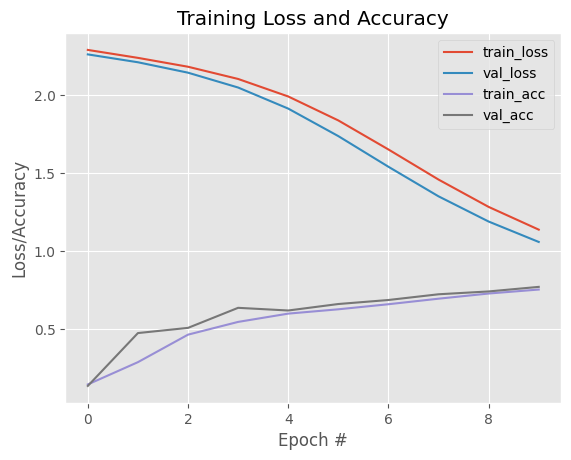

In [58]:
plt.figure()
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["val_loss"], label="val_loss")
plt.plot( H.history["accuracy"], label="train_acc")
plt.plot( H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.plot()